In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install jovian opendatasets --upgrade --quiet
import opendatasets as od

     |████████████████████████████████| 68 kB 3.0 MB/s 


In [3]:
dataset_url = 'https://www.kaggle.com/omeret/not-safe-for-work'

In [4]:
!pip install jovian opendatasets --upgrade --quiet
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: akymaster
Your Kaggle Key: ··········


100%|██████████| 19.4G/19.4G [06:31<00:00, 53.3MB/s]


In [5]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import torchvision.transforms as transforms

In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
data_dir = './not-safe-for-work'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['nsfw', 'sfw']


In [9]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [10]:
transform = transforms.Compose([

    transforms.Resize(256),
    transforms.CenterCrop(256),

    transforms.ToTensor(),
])

In [11]:
trainset = ImageFolder(data_dir+'/train', transform=transform)
testset = ImageFolder(data_dir+'/test', transform=transform)

In [40]:
trainset_subset = torch.utils.data.Subset(trainset, np.random.choice(len(trainset), 5000, replace=False))
testset_subset = torch.utils.data.Subset(testset, np.random.choice(len(testset), 100, replace=False))

In [33]:
img, label = trainset_subset[0]
print(img.shape, label)
print(len(trainset_subset))
print(len(testset_subset))

torch.Size([3, 256, 256]) 0
5000
100


In [15]:
input_size = 65536*3
hidden_size = 500 
num_classes = 2
num_epochs = 10
batch_size = 100
learning_rate = 0.001 

In [16]:
train_loader = torch.utils.data.DataLoader(
    dataset=trainset_subset,
    batch_size=batch_size,
    shuffle=False  
)

In [41]:
test_loader = torch.utils.data.DataLoader(
    dataset=testset_subset,
    batch_size=batch_size,
    shuffle=False
)

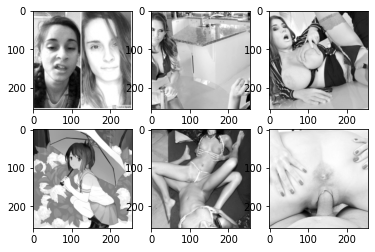

In [18]:
 examples = iter(test_loader)
 example_data, example_targets = examples.next()
 for i in range(6):
     plt.subplot(2,3,i+1)
     plt.imshow(example_data[i][0], cmap='gray')
 plt.show() 

In [19]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.LeakyReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [20]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)

## 10 epochs

In [23]:
# Train the model
n_total_steps = len(train_loader)
loss_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 256*256*3).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_list.append(loss.item())
        if (i+1) % 10 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
    print()

Epoch [1/10], Step [10/50], Loss: 25.9096
Epoch [1/10], Step [20/50], Loss: 1.8519
Epoch [1/10], Step [30/50], Loss: 1.9161
Epoch [1/10], Step [40/50], Loss: 4.1366
Epoch [1/10], Step [50/50], Loss: 2.1273

Epoch [2/10], Step [10/50], Loss: 8.3146
Epoch [2/10], Step [20/50], Loss: 1.4379
Epoch [2/10], Step [30/50], Loss: 13.0775
Epoch [2/10], Step [40/50], Loss: 2.3738
Epoch [2/10], Step [50/50], Loss: 6.0402

Epoch [3/10], Step [10/50], Loss: 2.8274
Epoch [3/10], Step [20/50], Loss: 13.5796
Epoch [3/10], Step [30/50], Loss: 3.6296
Epoch [3/10], Step [40/50], Loss: 2.1968
Epoch [3/10], Step [50/50], Loss: 2.1744

Epoch [4/10], Step [10/50], Loss: 2.4998
Epoch [4/10], Step [20/50], Loss: 8.5062
Epoch [4/10], Step [30/50], Loss: 1.4848
Epoch [4/10], Step [40/50], Loss: 2.1500
Epoch [4/10], Step [50/50], Loss: 3.3211

Epoch [5/10], Step [10/50], Loss: 5.2145
Epoch [5/10], Step [20/50], Loss: 8.2313
Epoch [5/10], Step [30/50], Loss: 1.7927
Epoch [5/10], Step [40/50], Loss: 2.1523
Epoch [5/

tensor([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 1])
NSFW


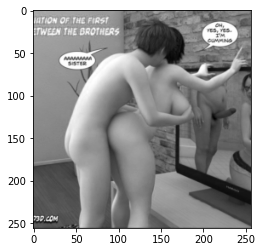

NSFW


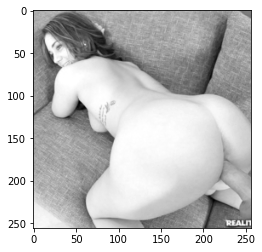

NSFW


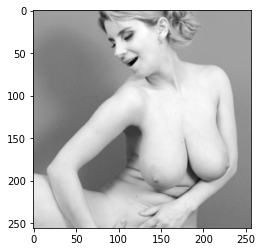

SFW


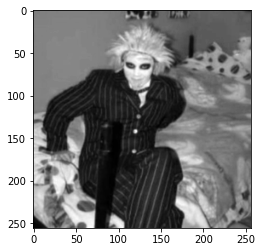

SFW


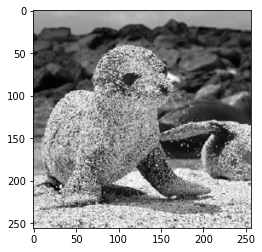

SFW


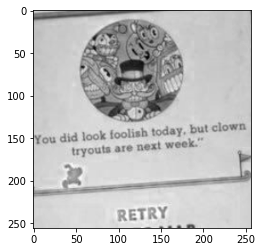

Accuracy of the network on the 100 test images: 62.0 %


In [69]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
examples = iter(test_loader)
j = 0
example_data, example_targets = examples.next()
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images1 = images.reshape(-1, 256*256*3).to(device)
        labels = labels.to(device)
        outputs = model(images1)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        print(predicted)
        # if predicted == label:
        #   plt.imshow(, cmap='gray')

        for i in range(len(predicted)):
          if predicted[i] == labels[i]:
            # plt.subplot(2,30,i+1)
            j += 1
            if j == 7:
              break
            
            plt.imshow(example_data[i][0], cmap='gray')
            if predicted[i] == 0:
              print("NSFW")
            else:
              print("SFW")
            
            plt.show() 
            
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 100 test images: {acc} %')

[]

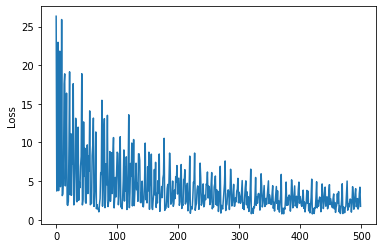

In [45]:
plt.plot(loss_list)
plt.ylabel("Loss")
plt.plot()

##  12 epochs

In [ ]:
# Train the model
n_total_steps = len(train_loader)
loss_list = []
for epoch in range(num_epochs + 2):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 256*256*3).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_list.append(loss.item())
        if (i+1) % 10 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
    print()

Epoch [1/10], Step [10/100], Loss: 0.6428
Epoch [1/10], Step [20/100], Loss: 0.6154
Epoch [1/10], Step [30/100], Loss: 0.5918
Epoch [1/10], Step [40/100], Loss: 0.5985
Epoch [1/10], Step [50/100], Loss: 0.6619
Epoch [1/10], Step [60/100], Loss: 0.5776
Epoch [1/10], Step [70/100], Loss: 0.5816
Epoch [1/10], Step [80/100], Loss: 0.6006
Epoch [1/10], Step [90/100], Loss: 0.5645
Epoch [1/10], Step [100/100], Loss: 0.5930

Epoch [2/10], Step [10/100], Loss: 0.5449
Epoch [2/10], Step [20/100], Loss: 0.5819
Epoch [2/10], Step [30/100], Loss: 0.5611
Epoch [2/10], Step [40/100], Loss: 0.5549
Epoch [2/10], Step [50/100], Loss: 0.5814
Epoch [2/10], Step [60/100], Loss: 0.5604
Epoch [2/10], Step [70/100], Loss: 0.5774
Epoch [2/10], Step [80/100], Loss: 0.5593
Epoch [2/10], Step [90/100], Loss: 0.5206
Epoch [2/10], Step [100/100], Loss: 0.5891

Epoch [3/10], Step [10/100], Loss: 0.5246
Epoch [3/10], Step [20/100], Loss: 0.5521
Epoch [3/10], Step [30/100], Loss: 0.5296
Epoch [3/10], Step [40/100], L

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 256*256*3).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 1000 test images: {acc} %')

Accuracy of the network on the 1000 test images: 75.0 %
